In [75]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import damex_algo as dmx

In [76]:
# Data extraction
data = genfromtxt('Data_Anne.csv', delimiter=',')
data = data[1:, 1:]
n, d = np.shape(data)
print n, d

18553 82


In [77]:
# Each feature is doubled, separating points above and below the mean
mean_data = np.mean(data, axis=0)
data_var = data - mean_data
data_doubled = np.zeros((n, 2*d))
for j in range(d):
    data_doubled[data_var[:, j] > 0, j] = data_var[data_var[:, j] > 0, j]  # Above the mean, for j=0,...,d-1
    data_doubled[data_var[:, j] < 0, d + j] = - data_var[data_var[:, j] < 0, j]  # Below the mean, for j=d,...,2*d-1

In [78]:
# Rank transformation, for each margin (column) V_i = n/(rank(X_i) + 1)
data_rank = clf.rank_transformation(data_doubled)

In [82]:
# Damex
k = 50
R = n/float(k)
x_extr = data_rank[np.max(data_rank, axis=1) > R]
eps = 0.3
x_damex = 1*(x_extr > eps*R)
print len(x_extr)

3233


In [83]:
# Cluster of identical line of x_damex
alphas_mass_damex = dmx.check_dataset(x_damex)  # List of faces (groups of features) along with the number of points inside
alphas_damex = [alpha[0] for alpha in alphas_mass_damex]

In [84]:
# Return the face and the number of points in the face
alphas_mass_damex[:10]  # 10 bigger faces

[([86, 119, 146, 147, 148], 35),
 ([4, 37, 64, 65], 32),
 ([18, 19, 20, 21], 26),
 ([100, 101, 102, 103, 104], 21),
 ([141, 142, 143, 144, 145], 20),
 ([18, 19, 20, 21, 22], 20),
 ([25, 67, 145], 20),
 ([114, 115, 116, 117, 118], 19),
 ([59, 60, 61, 62, 63], 18),
 ([151, 156], 17)]

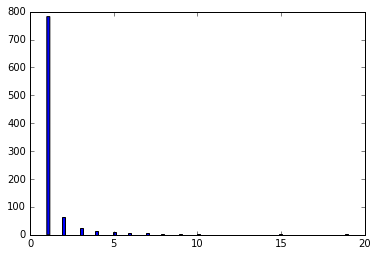

In [52]:
alphas_mass = [alphas[1] for alphas in alphas_mass_damex]
plt.hist(alphas_mass, bins=100)
plt.show()